<a href="https://colab.research.google.com/github/shahfarmanAli/3BeezTech/blob/main/Copy_of_frandom_forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
file_path = "/content/GOOG (1).csv"

In [ ]:
data = pd.read_csv("/content/GOOG (1).csv")

In [ ]:
data_info = data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   symbol       1258 non-null   object 
 1   date         1258 non-null   object 
 2   close        1258 non-null   float64
 3   high         1258 non-null   float64
 4   low          1258 non-null   float64
 5   open         1258 non-null   float64
 6   volume       1258 non-null   int64  
 7   adjClose     1258 non-null   float64
 8   adjHigh      1258 non-null   float64
 9   adjLow       1258 non-null   float64
 10  adjOpen      1258 non-null   float64
 11  adjVolume    1258 non-null   int64  
 12  divCash      1258 non-null   float64
 13  splitFactor  1258 non-null   float64
dtypes: float64(10), int64(2), object(2)
memory usage: 137.7+ KB


In [ ]:
data_head = data.head()

In [ ]:
data.isnull().sum()

,0
symbol,0
date,0
close,0
high,0
low,0
open,0
volume,0
adjClose,0
adjHigh,0
adjLow,0


In [ ]:
data['date'] = pd.to_datetime(data['date'])

rop the 'symbol' column (constant value) and 'date' column (won't be used for prediction)

In [ ]:
data_cleaned = data.drop(columns=['symbol', 'date'])

Define features (X) and target (y)

In [ ]:
X = data_cleaned.drop(columns=['close'])

In [ ]:
y = data_cleaned['close']

Split the data into training and testing sets (80% train, 20% test)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Train a Random Forest model

In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
X_train_index = np.arange(len(X_train)).reshape(-1, 1)

In [ ]:
y_train = y_train.ravel()

NameError: name 'train' is not defined

Predict on the test set

In [ ]:
y_pred = model.predict(X_test)

Calculate model accuracy (R2 score) and Mean Squared Error (MSE)

In [ ]:
r2 = r2_score(y_test, y_pred)

In [ ]:
mse = mean_squared_error(y_test, y_pred)

In [ ]:
print(f'R2 Score: {r2}')
print(f'Mean Squared Error: {mse}')

In [ ]:
accuracy = r2 * 100

In [ ]:
print(f"R² Score (Accuracy): {accuracy:.2f}%")

Visualize predicted vs actual values

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2)
plt.title("Actual vs Predicted Close Prices")
plt.xlabel("Actual Close Prices")
plt.ylabel("Predicted Close Prices")
plt.show()

 Feature importance plot

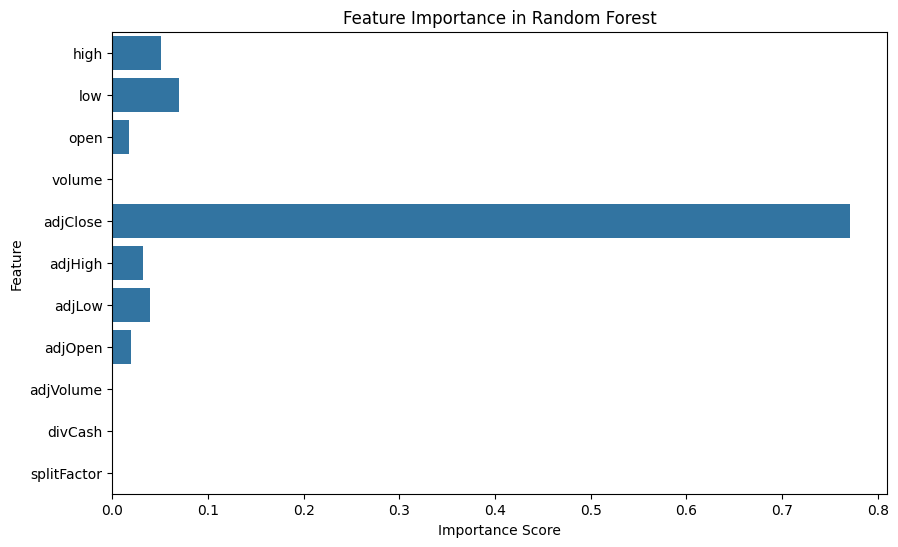

In [ ]:
importances = model.feature_importances_
features = X.columns

plt.figure(figsize=(10, 6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance in Random Forest")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.show()

In [ ]:

df = data.loc[:, ["open"]].values
train = df[:len(df)-50]
test = df[len(train):]

train = train.reshape(-1, 1)
test = test.reshape(-1, 1)

print(train.shape, test.shape)

(1208, 1) (50, 1)


In [ ]:
train.shape

(1208, 1)

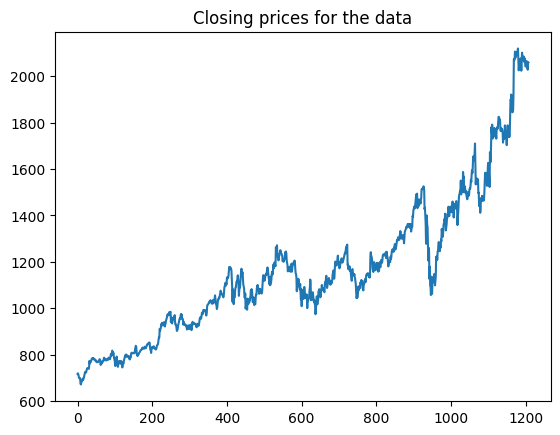

In [ ]:
plt.plot(train);
plt.title("Closing prices for the data");

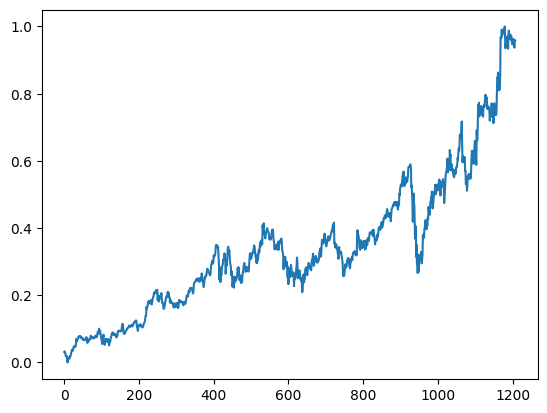

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range= (0,1))
train_scaled = scaler.fit_transform(train)

plt.plot(train_scaled)
plt.show()

 Line Plot

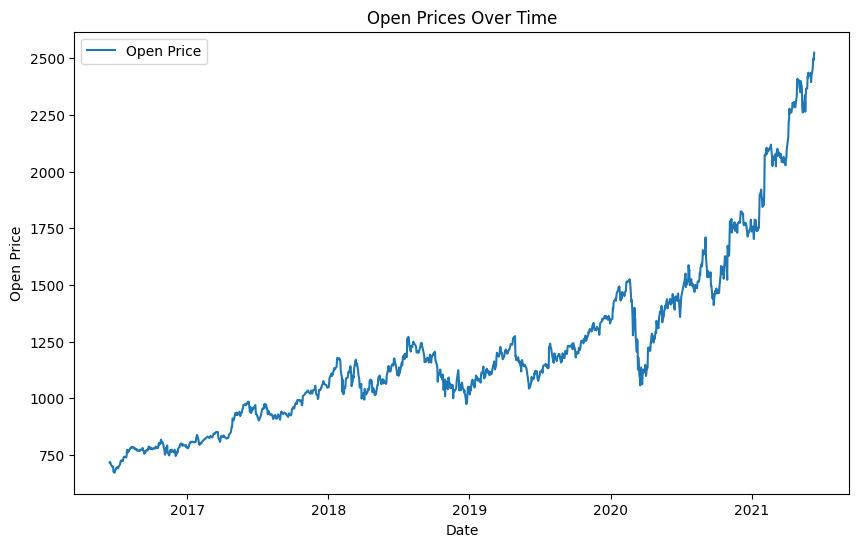

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(data['date'], data['open'], label='Open Price')
plt.title('Open Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Open Price')
plt.legend()
plt.show()

 Scatter Plot

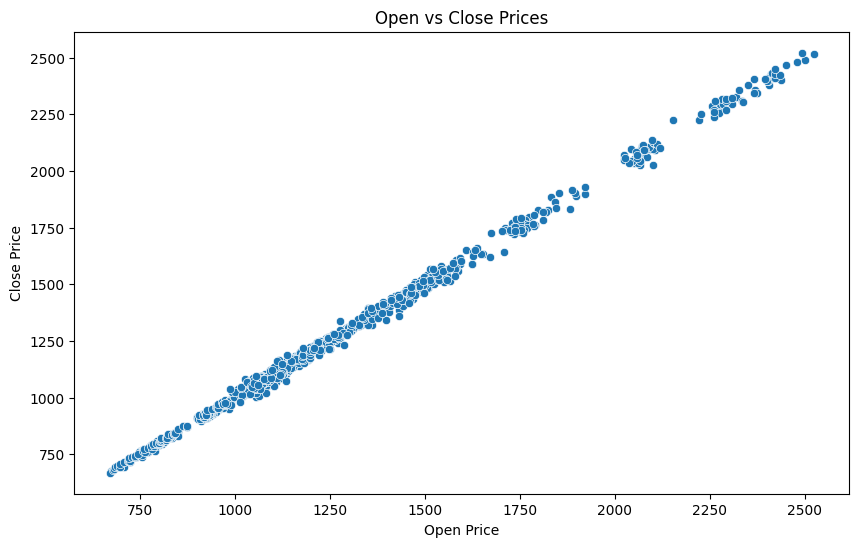

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['open'], y=data['close'])
plt.title('Open vs Close Prices')
plt.xlabel('Open Price')
plt.ylabel('Close Price')
plt.show()

Histogram

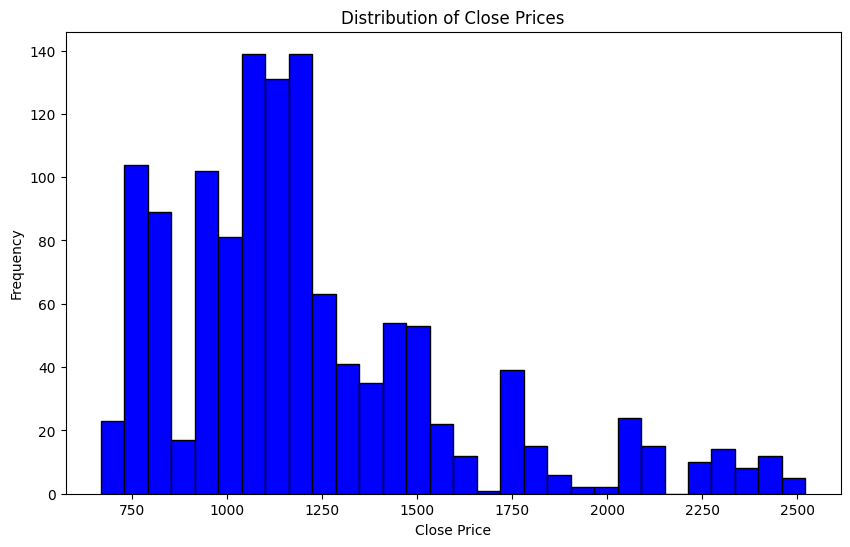

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(data['close'], bins=30, color='blue', edgecolor='black')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()

Bar Plot

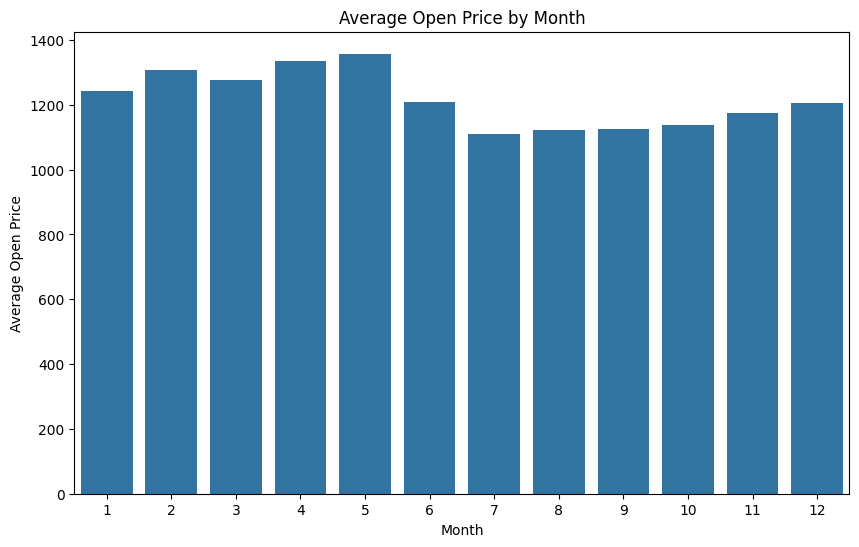

In [ ]:
data['month'] = data['date'].dt.month
monthly_avg = data.groupby('month')['open'].mean()

plt.figure(figsize=(10, 6))
sns.barplot(x=monthly_avg.index, y=monthly_avg.values)
plt.title('Average Open Price by Month')
plt.xlabel('Month')
plt.ylabel('Average Open Price')
plt.show()

Box Plot

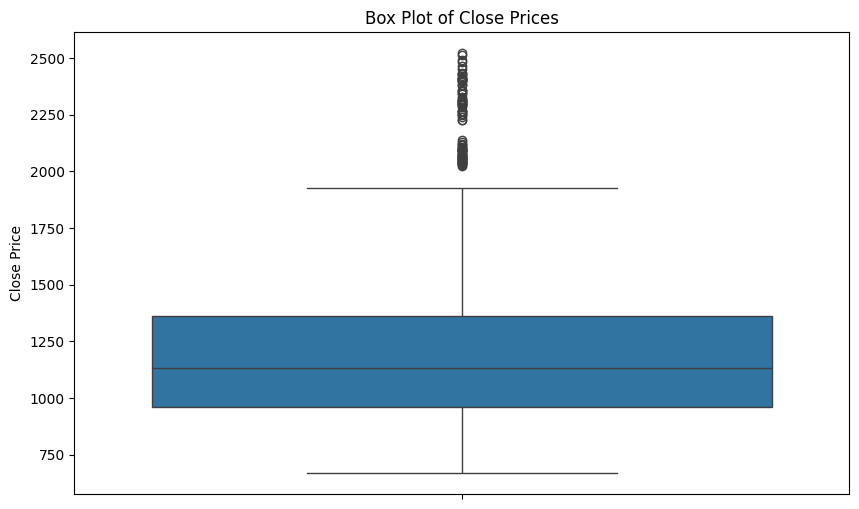

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['close'])
plt.title('Box Plot of Close Prices')
plt.ylabel('Close Price')
plt.show()

 Heatmap

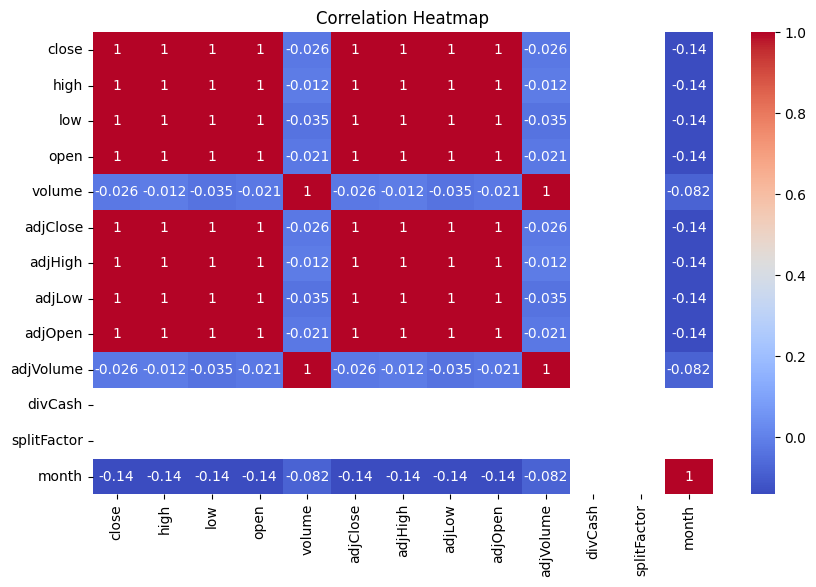

In [ ]:
plt.figure(figsize=(10, 6))
# Convert numeric columns to float
correlation_matrix = data.select_dtypes(include=['number']).corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()